In [1]:
# Dependencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from citipy import citipy
from pandas import DataFrame
from scipy.stats import linregress

In [2]:
# Store filepath in a variable
Housing_data = "cleaned_housing_data.csv"

In [3]:
# Read our Data file with the pandas library
# Not every CSV requires an encoding, but be aware this can come up
Housing_data_df = pd.read_csv(Housing_data)

In [4]:
# Show just the header
Housing_data_df.head()

,state,counties,city,price,type,beds,baths,sqfeet,latlong
0,ca,sacramento,roseville,1900,apartment,3,2.0,1250,"(38.7724, -121.263)"
1,ca,sacramento,rosemont,1325,apartment,1,1.0,640,"(38.5643, -121.378)"
2,ca,sacramento,florin,2010,apartment,3,2.0,1232,"(38.4249, -121.471)"
3,ca,sacramento,manteca,2699,house,4,3.5,2660,"(37.7661, -121.201)"
4,ca,sacramento,folsom,1450,apartment,1,1.0,700,"(38.6709, -121.153)"


In [5]:
# Renaming the headers to be consistent with crime_data.csv
Renamed_Housing_data_df = Housing_data_df.rename(columns={"city": "Sac County City","price": "Monthly price($)"})
Renamed_Housing_data_df

,state,counties,Sac County City,Monthly price($),type,beds,baths,sqfeet,latlong
0,ca,sacramento,roseville,1900,apartment,3,2.0,1250,"(38.7724, -121.263)"
1,ca,sacramento,rosemont,1325,apartment,1,1.0,640,"(38.5643, -121.378)"
2,ca,sacramento,florin,2010,apartment,3,2.0,1232,"(38.4249, -121.471)"
3,ca,sacramento,manteca,2699,house,4,3.5,2660,"(37.7661, -121.201)"
4,ca,sacramento,folsom,1450,apartment,1,1.0,700,"(38.6709, -121.153)"
...,...,...,...,...,...,...,...,...,...
2380,ca,sacramento,west sacramento,1625,apartment,1,1.0,735,"(38.4962, -121.53)"
2381,ca,sacramento,rancho cordova,1100,apartment,1,1.0,620,"(38.5934, -121.318)"
2382,ca,sacramento,florin,1300,apartment,2,1.0,808,"(38.4743, -121.445)"
2383,ca,sacramento,lincoln,2595,house,4,3.0,2370,"(38.9025, -121.32)"


In [6]:
# Filtering to get the cities in sacramento county, consistent with data in crime_data excel sheet
Sacramento_Housing_df = Renamed_Housing_data_df.loc[Renamed_Housing_data_df["Sac County City"].isin(["sacramento","citrus heights","elk grove","folsom","galt","rancho cordova"])]
#Sacramento_Housing_df

# sorting by first name 
#Sacramento_Housing_df.sort_values("Sac County City", inplace = True) 

#df.sort_values('C', ascending=False).drop_duplicates(subset=['A', 'B'],inplace = True)

#df.sort_values('C', ascending=False).drop_duplicates(subset=['A', 'B'])

# Remove duplicate rows
Sacramento_Housing_df.drop_duplicates(subset =["Sac County City","Monthly price($)","beds","baths","sqfeet","latlong"],inplace = True)
Sacramento_Housing_df

C:\Users\yekhi\anaconda3\envs\PythonDataViz\lib\site-packages\ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]


,state,counties,Sac County City,Monthly price($),type,beds,baths,sqfeet,latlong
4,ca,sacramento,folsom,1450,apartment,1,1.0,700,"(38.6709, -121.153)"
5,ca,sacramento,sacramento,1211,apartment,1,1.0,632,"(38.6131, -121.506)"
6,ca,sacramento,citrus heights,1250,apartment,1,1.0,710,"(38.6946, -121.269)"
8,ca,sacramento,citrus heights,1199,apartment,1,1.0,640,"(38.7113, -121.272)"
11,ca,sacramento,rancho cordova,1177,apartment,1,1.0,704,"(38.5786, -121.295)"
...,...,...,...,...,...,...,...,...,...
2325,ca,sacramento,sacramento,1495,house,2,1.0,832,"(38.6157, -121.505)"
2346,ca,sacramento,sacramento,1695,apartment,1,1.0,700,"(38.5817, -121.485)"
2351,ca,sacramento,sacramento,1350,apartment,0,1.0,475,"(38.5813, -121.484)"
2352,ca,sacramento,rancho cordova,2795,house,5,3.0,2584,"(38.5802, -121.274)"


In [7]:
# plot a bar chart by cities 

# Create a group based on the values in the 'Sac County City' column
city_group = Sacramento_Housing_df.groupby('Sac County City')
# Count how many times each city appears in our group
count_cities = city_group['Sac County City'].count()
count_cities

#count_cities

Sac County City
citrus heights     98
elk grove          54
folsom             71
galt                2
rancho cordova     50
sacramento        192
Name: Sac County City, dtype: int64

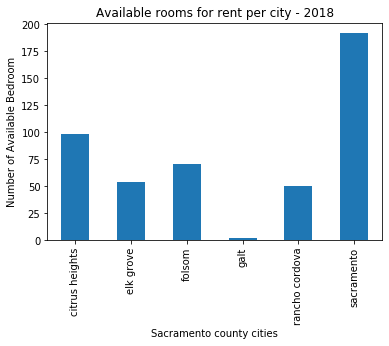

<Figure size 432x288 with 0 Axes>

In [8]:
# Create a bar chart based off of the group series from before
count_chart = count_cities.plot(kind='bar')

# Set the xlabel and ylabel using class methods
count_chart.set_xlabel("Sacramento county cities")
count_chart.set_ylabel("Number of Available Bedroom")
plt.title("Available rooms for rent per city - 2018")

plt.show()
plt.savefig("available_rooms_for_rent_per_city.jpeg")
plt.tight_layout()

In [9]:
# Filtering to get the cities in sacramento county, consistent with data in crime_data excel sheet
Sacramento_Elk_grove_Housing_df = Sacramento_Housing_df.loc[Sacramento_Housing_df["Sac County City"].isin(["elk grove"])]
Sacramento_Elk_grove_Housing_df.head(5)

,state,counties,Sac County City,Monthly price($),type,beds,baths,sqfeet,latlong
123,ca,sacramento,elk grove,1600,apartment,2,2.0,1067,"(38.428, -121.418)"
132,ca,sacramento,elk grove,1919,apartment,2,2.0,1058,"(38.4243, -121.437)"
143,ca,sacramento,elk grove,1948,apartment,3,2.0,1232,"(38.428, -121.418)"
168,ca,sacramento,elk grove,2900,house,7,3.0,2900,"(38.4243, -121.437)"
172,ca,sacramento,elk grove,1396,apartment,1,1.0,681,"(38.428, -121.418)"


In [10]:
#Correlation function of the elk grove data frames - Since Elk grove has the least crime rate 
Elk_grove_correlation_df = Sacramento_Elk_grove_Housing_df.corr()
Elk_grove_correlation_df

,Monthly price($),beds,baths,sqfeet
Monthly price($),1.000000,0.896390,0.852487,0.878584
beds,0.896390,1.000000,0.847483,0.842043
baths,0.852487,0.847483,1.000000,0.811948
sqfeet,0.878584,0.842043,0.811948,1.000000


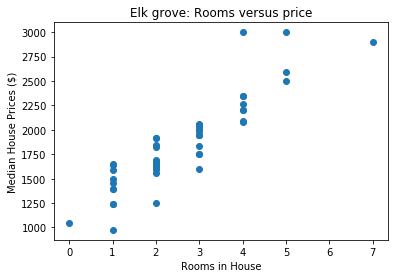

In [11]:
#plot a scatter plot of Monthly price against rooms - rooms versus price
x_values = Sacramento_Elk_grove_Housing_df['beds']
y_values = Sacramento_Elk_grove_Housing_df['Monthly price($)']
plt.scatter(x_values,y_values)
plt.xlabel('Rooms in House')
plt.ylabel('Median House Prices ($)')
plt.title('Elk grove: Rooms versus price')
plt.show()

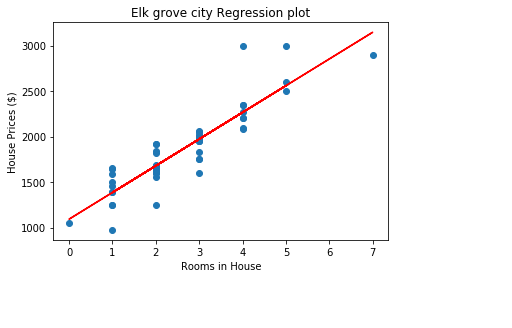

<Figure size 432x288 with 0 Axes>

In [12]:
# Adding the linear regression equation and line to plot
x_values = Sacramento_Elk_grove_Housing_df['beds']
y_values = Sacramento_Elk_grove_Housing_df['Monthly price($)']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Rooms in House')
plt.ylabel('House Prices ($)')
plt.title('Elk grove city Regression plot')
plt.show()
plt.savefig("Regression_House_prices_prediction.jpeg")

In [13]:
# Machine Learning - Training and Testing our linear regression model

cols_selected = ['beds', 'baths', 'sqfeet', 'Monthly price($)']
df = Sacramento_Elk_grove_Housing_df[cols_selected].head(5)
df

,beds,baths,sqfeet,Monthly price($)
123,2,2.0,1067,1600
132,2,2.0,1058,1919
143,3,2.0,1232,1948
168,7,3.0,2900,2900
172,1,1.0,681,1396


In [14]:
# Data partitioning into training and testing sets

from sklearn.model_selection import train_test_split
X = Sacramento_Elk_grove_Housing_df[cols_selected].iloc[:,0:3].values     
y = Sacramento_Elk_grove_Housing_df[cols_selected]['Monthly price($)']

X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.4, random_state=0)

In [15]:
# Building multiple linear regression model 

from sklearn.linear_model import LinearRegression
slr = LinearRegression()

slr.fit(X_train, y_train)
y_train_pred = slr.predict(X_train)
y_test_pred = slr.predict(X_test)

score = slr.score(X, y)
print(f"R2 Score: {score}")

R2 Score: 0.8511968309882394


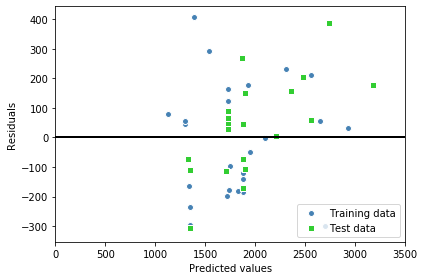

In [16]:
plt.scatter(y_train_pred,  y_train_pred - y_train,
            c='steelblue', marker='o', edgecolor='white',
            label='Training data')
plt.scatter(y_test_pred,  y_test_pred - y_test,
            c='limegreen', marker='s', edgecolor='white',
            label='Test data')
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.legend(loc='upper left')
plt.hlines(y=0, xmin=0, xmax=3500, color='black', lw=2)
plt.xlim([0, 3500])
plt.tight_layout()
plt.legend(loc='lower right')
plt.show()

In [24]:
#Evaluating the regression model

from sklearn.metrics import r2_score

print('R^2 train: %.3f, test: %.3f' % (
        r2_score(y_train, y_train_pred),
        r2_score(y_test, y_test_pred)))

R^2 train: 0.859, test: 0.830


In [25]:
# Since the parameters: bedrooms, bath and sqfoot are all strongly correlated with the Monthly price, we need to use a 
# method like PCA(Principal Component Analysis) to remove the correlation between features to help decrease computational
# time for the model training, testing and evaluation. This is a powerful tool for a hundreds or thousands of complex of 
# datasets, but for our case, we are interested in 3 variables, hence PCA is would be inconsequential and not used here
# Selecting important variables (columns)

#Principal Component Analysis

train_score = []
test_score = []
cum_variance = []

In [26]:
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
X = Sacramento_Elk_grove_Housing_df[cols_selected].iloc[:,0:3].values     
y = Sacramento_Elk_grove_Housing_df[cols_selected]['Monthly price($)']  
from sklearn.preprocessing import StandardScaler
sc_y = StandardScaler()
sc_x = StandardScaler()
y_std = sc_y.fit_transform(y_train[:, np.newaxis]).flatten()

In [27]:
for i in range(1,4):
    X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.4, random_state=0)
    y_train_std = sc_y.fit_transform(y_train[:, np.newaxis]).flatten()
    from sklearn.preprocessing import StandardScaler
    from sklearn.decomposition import PCA
    from sklearn.linear_model import LinearRegression
    from sklearn.pipeline import Pipeline
    pipe_lr = Pipeline([('scl', StandardScaler()),('pca', PCA(n_components=i)),('slr', LinearRegression())])
    pipe_lr.fit(X_train, y_train_std)
    y_train_pred_std=pipe_lr.predict(X_train)
    y_test_pred_std=pipe_lr.predict(X_test)
    y_train_pred=sc_y.inverse_transform(y_train_pred_std)
    y_test_pred=sc_y.inverse_transform(y_test_pred_std)
    train_score = np.append(train_score, r2_score(y_train, y_train_pred))
    test_score = np.append(test_score, r2_score(y_test, y_test_pred))
    cum_variance = np.append(cum_variance, np.sum(pipe_lr.fit(X_train, y_train).named_steps['pca'].explained_variance_ratio_))

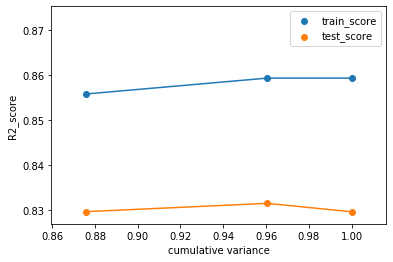

In [28]:
plt.scatter(cum_variance,train_score, label = 'train_score')
plt.plot(cum_variance, train_score)
plt.scatter(cum_variance,test_score, label = 'test_score')
plt.plot(cum_variance, test_score)
plt.xlabel('cumulative variance')
plt.ylabel('R2_score')
plt.legend()
plt.show()